In [1]:
!pip install numpy
!pip install panda


In [4]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00


1.import Dependencies


In [5]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Flower_dataset.csv')
df
features=np.array(df[['X1','X2']])
labels=np.array(df['Y']).reshape(-1,1)

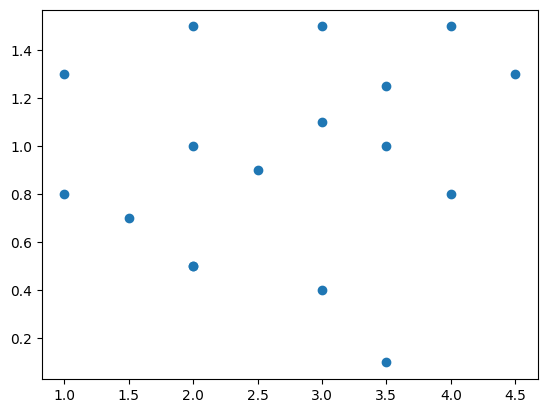

In [7]:
plt.scatter(x=df['X1'],y=df['X2'])

In [8]:
def sigmoid(x):    
    return 1/(1+np.exp(-x))

def cost(P,A):
    return (P-A)**2

def d_cost(P,A):
    h=0.001
    return (cost(P+h,A)-cost(P,A))/h

def d_sigmoid(x):
    h=0.0001
    return (sigmoid(x+h)-sigmoid(x))/h




def train_model_perceptron(weights,bias,alpha,features,labels,epochs):
    for epoch in range(int(epochs)): 
        z=np.dot(features,weights)+bias
        P=[sigmoid(i) for i in z]
        for index in range(len(z)):
            weights=[weights[indx]-alpha*d_cost(P[index],labels[index][0])*d_sigmoid(z[index])*features[index][indx] for indx in range(len(weights))]    
            bias=bias-alpha*d_cost(P[index],labels[index][0])*d_sigmoid(z[index])
    return weights,bias

Testing Perceptron

Enter value of length and width seperate with comma: 5,5
[5.0, 5.0]
1


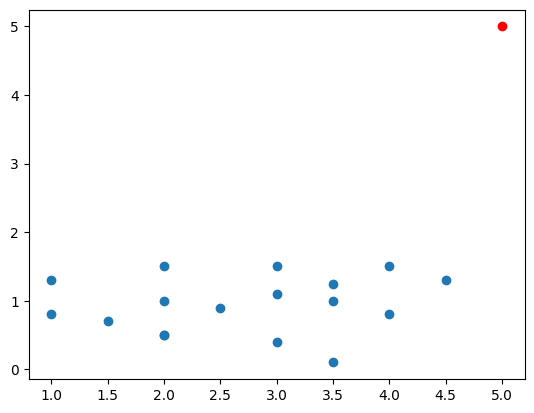

In [10]:
weights=np.array([0.25,0.65])
bias=0.25
alpha=0.001

weights,bias=train_model_perceptron(weights,bias,alpha,features,labels,3500)
input_val=[float(i) for i in (input('Enter value of length and width seperate with comma: ')).split(',')]
print(input_val)
z=np.dot(input_val,weights)+bias
output=sigmoid(z)
if output>=0.50:
    output=1 
else: 
    output=0
print(output)

#See where our point lies at the end 
plt.scatter(x=df['X1'],y=df['X2'])
plt.scatter(x=input_val[0],y=input_val[1],color='red')
#Assignment plot the hypothetical line that is sperating 2 classes linear seperator.
plt.show()

In [2]:
7

7

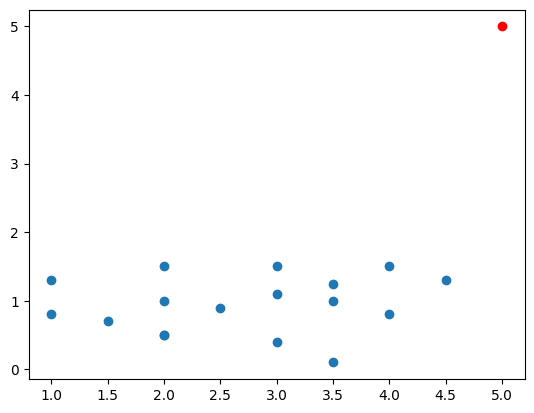

In [11]:
#See where our point lies at the end 
plt.scatter(x=df['X1'],y=df['X2'])
plt.scatter(x=input_val[0],y=input_val[1],color='red')
#Assignment plot the hypothetical line that is sperating 2 classes linear seperator.
plt.show()

In [15]:
def generate_dataset(dims):

    def xor_output(x):
        return x%2


    df=pd.DataFrame()
    for i in range(0,dims):
        while True: 
            A=[random.randrange(0,2) for i in range(0,2**dims)]
            if A.count(1)==(2**dims)/2:
                break
        df[str(i)]=A

    op=0
    for i in df.columns:
        op+=df[i]

    df['Y']=op
    df['Y']=df['Y'].apply(xor_output)
    df
    return df 

dims=int(input('Enter number of dims: '))
data=generate_dataset(dims)
data

Enter number of dims: 3


,0,1,2,Y
0,1,1,1,1
1,1,0,1,0
2,1,1,1,1
3,0,1,1,0
4,0,0,0,0
5,0,1,0,1
6,0,0,0,0
7,1,0,0,1


In [16]:
def generate_weights(data):
    print(data.columns)
    n=len(data.columns)-1
    return [random.uniform(0,1) for i in range(n)],random.uniform(-1,1)


def getting_proper_data(data,weights,bias):
    features=np.array(data.drop(columns=['Y']))
    labels=np.array(data['Y']).reshape(-1,1)
    weights=np.array(weights)
    bias=np.array(bias)
    return features,labels,weights,bias

alpha=10**-3
weights,bias=generate_weights(data)
features,labels,weights,bias=getting_proper_data(data,weights,bias)
weights,bias=train_model_perceptron(weights,bias,alpha,features,labels,3500)

Index(['0', '1', '2', 'Y'], dtype='object')


In [17]:
print(weights)
print(bias)

print('\nPredictor: ')
op=sigmoid(np.dot(weights,[1,1,1])+bias)
print(op)

[0.8214367600595841, 1.1932360568099523, -0.6264797451835535]
-0.5640609969060966

Predictor: 
0.6951127602336915


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_dim=(data.drop(columns=['Y'])).shape[1]))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128*2,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

X=np.array(data.drop(columns=['Y']))
Y=np.array(data['Y']).reshape(-1,1)
model.fit(X,Y,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.6963 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 24ms/step - loss: 0.6957 - accuracy: 0.2500
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6950 - accuracy: 0.2500
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6917 - accuracy: 0.7500
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6911 - accuracy: 0.8750
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6904 - accuracy: 0.8750
Epoch 11/300
1/1 [===

1/1 [==============================] - 0s 16ms/step - loss: 0.6524 - accuracy: 0.7500
Epoch 85/300
1/1 [==============================] - 0s 24ms/step - loss: 0.6520 - accuracy: 0.7500
Epoch 86/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6516 - accuracy: 0.7500
Epoch 87/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6511 - accuracy: 0.7500
Epoch 88/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6507 - accuracy: 0.7500
Epoch 89/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.7500
Epoch 90/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6499 - accuracy: 0.7500
Epoch 91/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6494 - accuracy: 0.7500
Epoch 92/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6490 - accuracy: 0.7500
Epoch 93/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6486 - accuracy: 0.7500
Epoch 94/300
1/1 [========

1/1 [==============================] - 0s 8ms/step - loss: 0.6175 - accuracy: 0.7500
Epoch 167/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6170 - accuracy: 0.7500
Epoch 168/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6166 - accuracy: 0.7500
Epoch 169/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6161 - accuracy: 0.7500
Epoch 170/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6157 - accuracy: 0.7500
Epoch 171/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6152 - accuracy: 0.7500
Epoch 172/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6148 - accuracy: 0.7500
Epoch 173/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6143 - accuracy: 0.7500
Epoch 174/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6138 - accuracy: 0.7500
Epoch 175/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6134 - accuracy: 0.7500
Epoch 176/300
1/1

1/1 [==============================] - 0s 8ms/step - loss: 0.5774 - accuracy: 0.7500
Epoch 249/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5768 - accuracy: 0.7500
Epoch 250/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5762 - accuracy: 0.7500
Epoch 251/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5757 - accuracy: 0.7500
Epoch 252/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5752 - accuracy: 0.7500
Epoch 253/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5746 - accuracy: 0.8750
Epoch 254/300
1/1 [==============================] - 0s 8ms/step - loss: 0.5741 - accuracy: 0.8750
Epoch 255/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5735 - accuracy: 0.8750
Epoch 256/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5729 - accuracy: 0.8750
Epoch 257/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5724 - accuracy: 0.8750
Epoch 258/300
1/

In [21]:
print(model.predict([[1,0,0]]))

1/1 [==============================] - 0s 171ms/step
[[0.5885037]]
